In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [53]:
df=pd.read_csv("rdf.csv")
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1.0,67.0,0.0,1.0,1.0,229.0,37.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.0,61.0,0.0,0.0,0.0,202.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1.0,80.0,0.0,1.0,0.0,106.0,32.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,49.0,0.0,0.0,1.0,171.0,34.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,79.0,1.0,0.0,0.0,174.0,24.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [54]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [55]:
x=df.drop("stroke",axis=1)
y=df.stroke
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [56]:
model=LogisticRegression(solver="lbfgs",class_weight="balanced").fit(x_train,y_train)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
y_predp=model.predict_proba(x_test)[:,1]

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,y_predp)

In [59]:
gmeans = np.sqrt(tpr * (1-fpr))

In [60]:
gmeans,np.argmax(gmeans)
ix=np.argmax(gmeans)

In [61]:
ix

71

In [62]:
thresholds[69] ###best threshold for gmean

0.5013462015915597

In [63]:
def to_labels(probs,threshold):
    return (probs > threshold).astype("int")

y_pred=to_labels(y_predp,thresholds[ix])

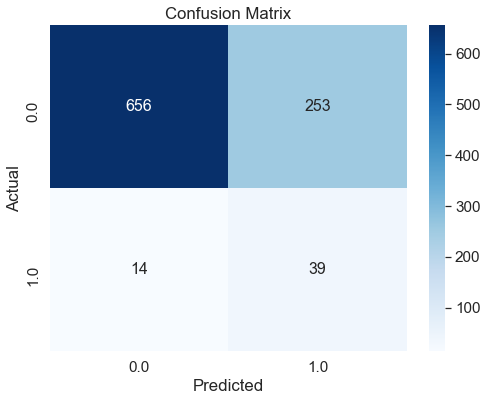

SCORES
accuracy_score:0.7224532224532224
f1_score:0.22608695652173916

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       909
         1.0       0.13      0.74      0.23        53

    accuracy                           0.72       962
   macro avg       0.56      0.73      0.53       962
weighted avg       0.93      0.72      0.80       962



In [64]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [66]:
## class weight + threshold tuning performed better than the others ( considering tpr)

In [68]:
ranges=np.linspace(0,0.99,100)
scores=[f1_score(y_test,to_labels(y_predp,x)) for x in ranges]

In [71]:
ix=np.argmax(scores)

In [72]:
print("""
Best threshold: {}
Best f1_score: {}
""".format(ranges[ix],scores[ix]))


Best threshold: 0.77
Best f1_score: 0.26035502958579887



In [73]:
y_pred=to_labels(y_predp,ranges[ix])

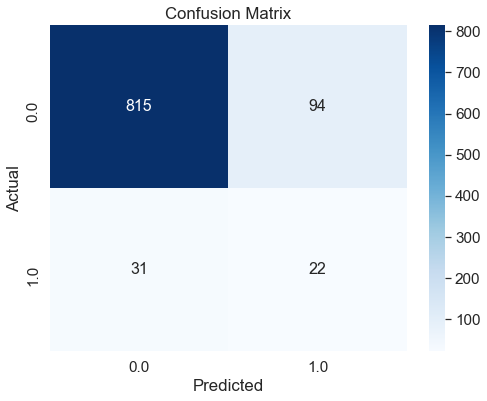

SCORES
accuracy_score:0.8700623700623701
f1_score:0.26035502958579887

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       909
         1.0       0.19      0.42      0.26        53

    accuracy                           0.87       962
   macro avg       0.58      0.66      0.59       962
weighted avg       0.92      0.87      0.89       962



In [74]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [75]:
### threshold tuning improved our f1_score